<a href="https://colab.research.google.com/github/AmirMohammadHakimiyan/machine_learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
le = LabelEncoder()
data_train = data_train.replace(['female', 'male'], [0, 1])

data_train['Age'].fillna(data_train["Age"].describe().min(),inplace=True)
data_train['Embarked'] = le.fit_transform(data_train['Embarked'])
data_train.dropna(inplace=True,axis=0)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2


### Preprocess

In [6]:
X_train = np.array(data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])
Y_train = np.array(data_train[['Survived']])

#### MLP - Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
loss=tf.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])

In [10]:
train_output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
7/7 [==============================] - 1s 6ms/step - loss: 0.9231 - accuracy: 0.5392
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7076 - accuracy: 0.6520
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7259 - accuracy: 0.5882
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.6765
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6863
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6404 - accuracy: 0.6765
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6323 - accuracy: 0.6667
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6170 - accuracy: 0.6863
Epoch 9/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6060 - accuracy: 0.6814
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.7402
Epoch 11/200
7/7 [===========

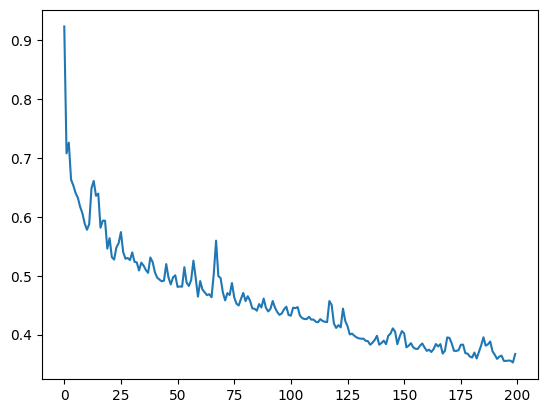

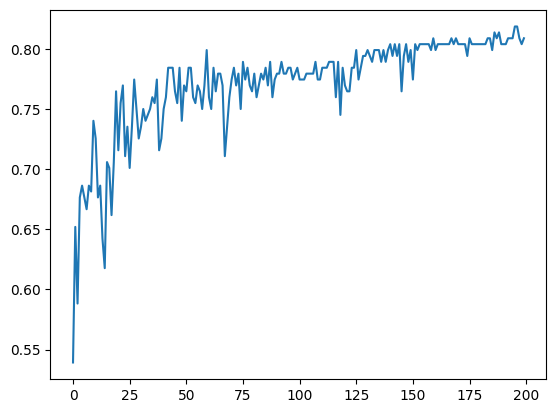

In [11]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

In [15]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
data_test_survive = pd.read_csv('gender_submission.csv')
data_test_survive.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [25]:
data_test['Age'].fillna(data_train["Age"].describe().min(),inplace=True)
data_test.dropna(inplace=True,axis=0)
le = LabelEncoder()
data_test['Embarked'] = le.fit_transform(data_test['Embarked'])
data_test = data_test.replace(['female', 'male'], [0, 1])

X_test = np.array(data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])
data_test['Survived'] = data_test_survive[['Survived']]
Y_test = np.array(data_test[['Survived']])

In [ ]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.9281


[0.3096151649951935, 0.9280575513839722]

### KNN

In [26]:


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
knn_accuracy = accuracy_score(Y_test, Y_pred)
knn_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.42206235011990406

c:\Users\98915\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
knn_accuracy = accuracy_score(Y_test, Y_pred)
knn_accuracy

0.42206235011990406

### Perceptron

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
class Perceptron:
    def __init__(self, epochs=200, lr=0.00001):
        self.w = np.random.rand(6, 1)
        self.b = np.random.rand(1, 1)
        self.lr = lr
        self.epochs = epochs

    def fit(self, x_train, y_train):
        for epoch in range(self.epochs):
            for i in range(x_train.shape[0]):
                y_pred = np.matmul(x_train[i], self.w) + self.b
                err = y_train[i] - y_pred
                self.w += (self.lr * x_train[i, :].T * err).T
                self.b += self.lr * err

    def predict(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred

    def evaluate(self, X, Y):
        y_pred = np.matmul(X, self.w) + self.b
        y_pred = np.where(y_pred < 0.5, 0, 1)
        return accuracy_score(Y, y_pred)

In [29]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
y_pred = perceptron.predict(X_test)
eval = perceptron.evaluate(X_test, Y_test)
eval

0.2853717026378897